In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
from yellowbrick.style import set_palette
from scipy import stats
import plotly.express as px

In [2]:
df = pd.read_csv(r"C:/Users/35383/Desktop/Online Courses/udemy_courses.csv")
df.describe()

,course_id,price,num_subscribers,num_reviews,num_lectures,content_duration
count,3.678000e+03,3678.000000,3678.000000,3678.000000,3678.000000,3678.000000
mean,6.759720e+05,66.049483,3197.150625,156.259108,40.108755,4.094517
std,3.432732e+05,61.005755,9504.117010,935.452044,50.383346,6.053840
min,8.324000e+03,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.076925e+05,20.000000,111.000000,4.000000,15.000000,1.000000
50%,6.879170e+05,45.000000,911.500000,18.000000,25.000000,2.000000
75%,9.613555e+05,95.000000,2546.000000,67.000000,45.750000,4.500000
max,1.282064e+06,200.000000,268923.000000,27445.000000,779.000000,78.500000


In [29]:
most_pop = df.nlargest(50,'num_subscribers')
most_pop.describe()

,course_id,price,num_subscribers,num_reviews,num_lectures,content_duration
count,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,332482.800000,82.800000,64465.400000,4857.380000,95.460000,11.164000
std,285159.581871,88.945982,40239.808804,6063.119457,105.676482,12.114669
min,11174.000000,0.000000,31499.000000,217.000000,9.000000,0.700000
25%,52102.000000,0.000000,41929.750000,1041.250000,24.000000,3.125000
50%,292012.000000,40.000000,52554.000000,2596.500000,45.500000,6.250000
75%,574411.500000,193.750000,73065.500000,5858.000000,118.250000,12.375000
max,949282.000000,200.000000,268923.000000,27445.000000,362.000000,51.000000


In [4]:
new_mostp = pd.DataFrame(most_pop.mean().to_dict(),index=[most_pop.index.values[-1]])
new_p = pd.DataFrame(df.mean().to_dict(),index=[df.index.values[-1]])

In [5]:
frames = [new_mostp, new_p] 
result = pd.concat(frames)
display(result)

,course_id,is_paid,price,num_subscribers,num_reviews,num_lectures,content_duration
2814,332482.800000,0.540000,82.800000,64465.400000,4857.380000,95.460000,11.164000
3677,675971.963295,0.915715,66.049483,3197.150625,156.259108,40.108755,4.094517


In [11]:
subject = ['50 Most Popular', 'All Courses']
result['subject'] = subject

In [13]:
result1 = result.set_index("subject")

In [24]:
result_t = result1.T

Text(0, 0.5, 'Average Counts')

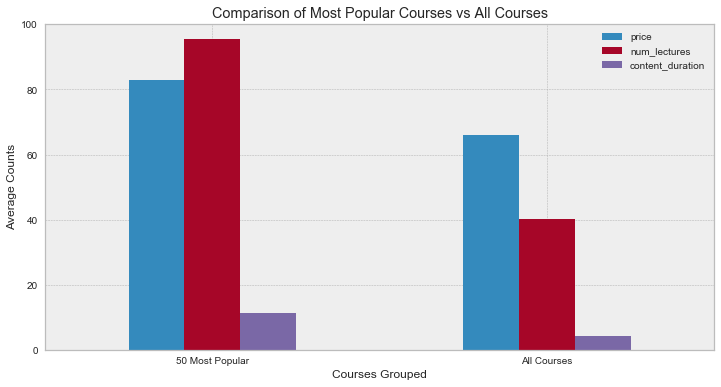

In [27]:
matplotlib.style.use('bmh') 
result1.plot(y=["price", "num_lectures", "content_duration"], kind="bar", figsize=(12,6))
plt.title("Comparison of Most Popular Courses vs All Courses")
plt.xticks(rotation=0, horizontalalignment="center")
plt.xlabel("Courses Grouped")
plt.ylabel("Average Counts")